##                               ML PROJECT ON BANK  MARKETTING PREDICTION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
bank_data = pd.read_csv("C:\\Users\\Laptop-PC\\Documents\\machine learning module\\bank-marketing.csv")

In [4]:
bank_data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Basic information about the data, including numerical summaries

In [5]:
bank_data.shape

(45211, 19)

bank data consist 45211 records and 19 columns

In [6]:
bank_data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

these are the different features in the data and 'response' is our target variable

In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


bank data consist total 19 columns where 8 columns are numerical and 11 columns are categorical

In [8]:
#  numerical summary of data 

bank_data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [9]:
bank_data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

mean value is 40.19 ,min value is -1 but (median) 50% of the values are -1 it clearly shows that something fishy in the values

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [10]:
# for the relevant values we have to remove unwanted values

bank_data.drop(bank_data[bank_data['pdays'] < 0 ].index,inplace=True)

In [11]:
bank_data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [12]:
# again describe pdays column after limiting the values

bank_data.pdays.describe().round(1)

count    8257.0
mean      224.6
std       115.3
min         1.0
25%       133.0
50%       194.0
75%       327.0
max       871.0
Name: pdays, dtype: float64

we can see that there is lot of difference in mean and median values now it looks better 

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

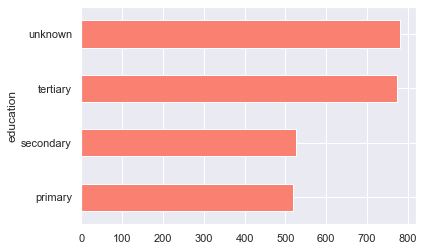

In [13]:
sb.set()
bank_data.groupby(['education'])['balance'].median().plot(kind='barh',color='salmon');


we can see that unknown group has the highest median 

### Make a box plot for pdays. Do you see any outliers?

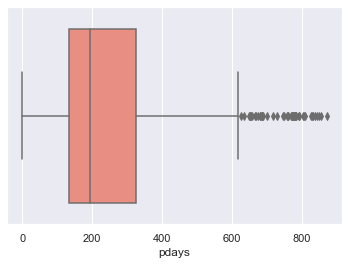

In [14]:
sb.boxplot(bank_data['pdays'],color='salmon');

yes,there are lot of outliers after 600

### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.

### Convert the response variable to a convenient form

In [15]:
bank_data=bank_data.replace({'response':{'yes':1,'no':0}})

In [16]:
bank_data[['response']].head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


### Make suitable plots for associations with numerical features and categorical features

In [17]:
categorical_features = []
numerical_features = []
for features in bank_data.columns:
    if bank_data[features].dtype=='O':
        categorical_features.append(features)
    else:
        numerical_features.append(features) 

In [18]:
print("categorical features",categorical_features)
print("numerical features",numerical_features)

categorical features ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical features ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


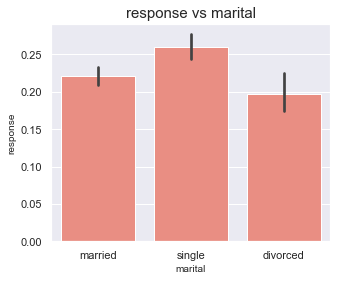

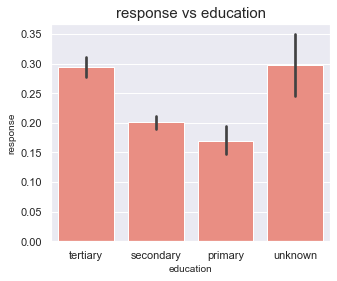

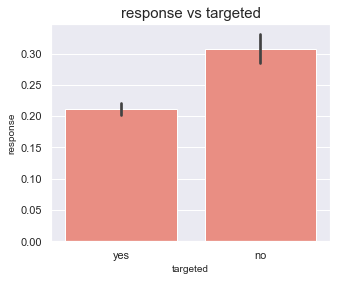

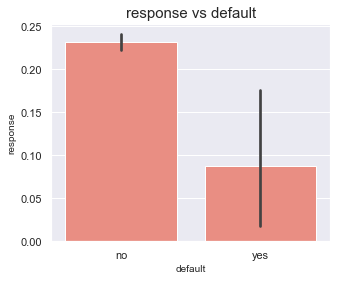

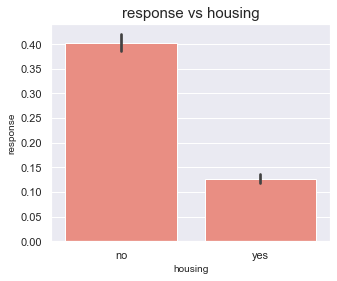

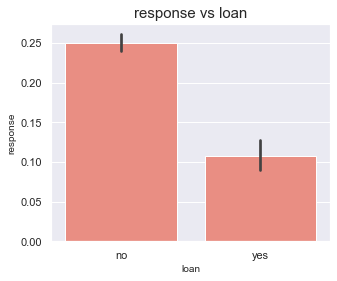

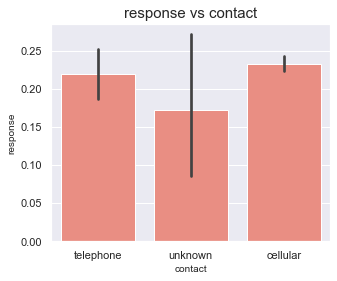

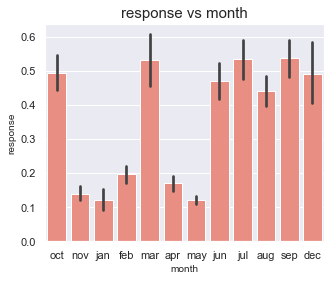

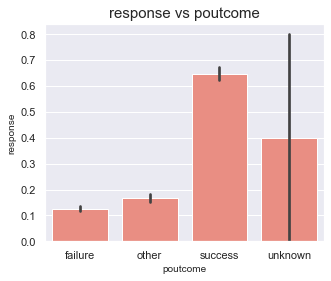

In [19]:

for features in categorical_features[1:]:
        plt.figure(figsize=(5,4))                                       
        sb.barplot(bank_data[features],bank_data['response'],color='salmon');
        plt.title("response vs "+features,fontsize=15)
        plt.xlabel(features,fontsize=10)
        plt.ylabel("response",fontsize=10)
    

<Figure size 792x1224 with 0 Axes>

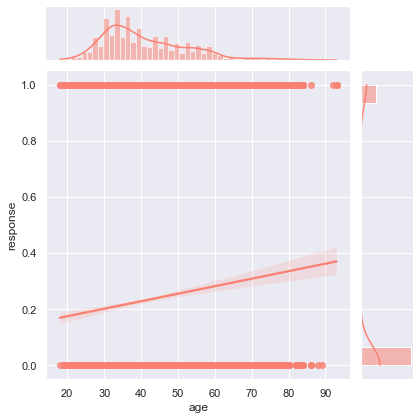

<Figure size 792x1224 with 0 Axes>

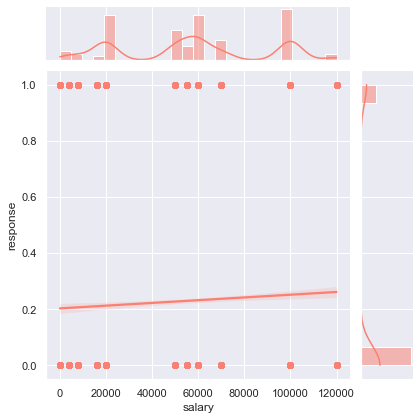

<Figure size 792x1224 with 0 Axes>

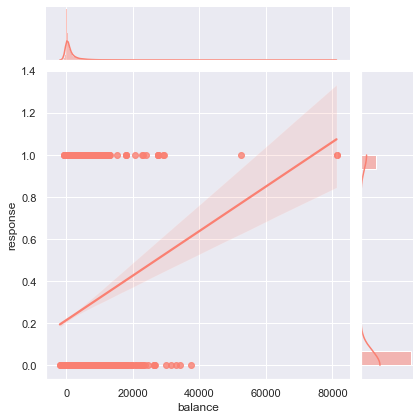

<Figure size 792x1224 with 0 Axes>

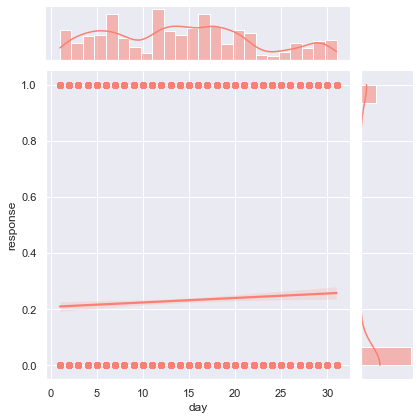

<Figure size 792x1224 with 0 Axes>

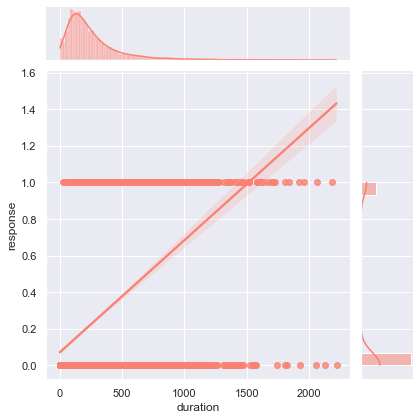

<Figure size 792x1224 with 0 Axes>

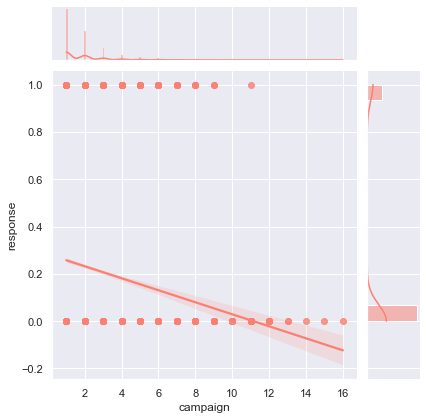

<Figure size 792x1224 with 0 Axes>

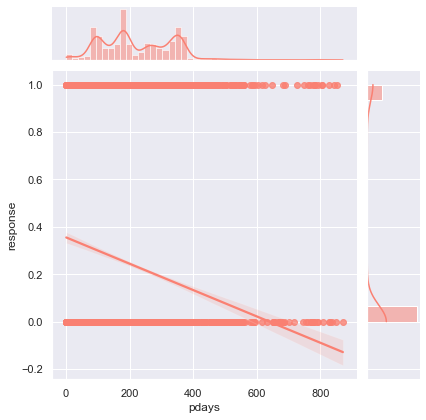

<Figure size 792x1224 with 0 Axes>

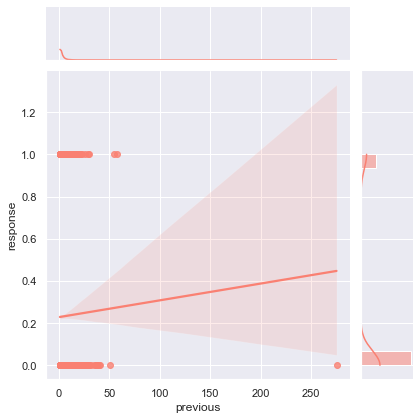

In [20]:

for features in numerical_features[:-1]:
    plt.figure(figsize=(11,17))
    sb.jointplot(x=bank_data[features],y=bank_data['response'],kind='reg',color='salmon')
    plt.xlabel(features,fontsize = 10)
    plt.ylabel("Response",fontsize = 10)


### Are the features about the previous campaign data useful?

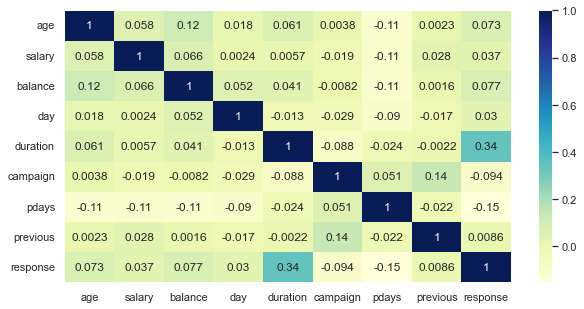

In [21]:
plt.figure(figsize=(10,5))
sb.heatmap(bank_data.corr(),annot=True,cmap="YlGnBu");

No, we can see that previous campaign data are not highly correlated with response variable

### Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision

yes,poutcome is associated with target variable because if the poutcome is success then there is a high chance to get successful response again,and pdays is not associated with target variable ,if pdays value is -1, that means person was not previously contacted so if we want to use them we have to drop these records because we have to work on those people who is involved in the campaign

## Data Pre-Processing Before Modelling

In [22]:
# we have more than 50% unknown value so removing unusual values because it may affect to the prediction values

bank_data.drop(bank_data[bank_data['poutcome']=='unknown'].index, inplace=True)
bank_data.drop(bank_data[bank_data['contact']=='unknown'].index, inplace=True)
bank_data.drop(bank_data[bank_data['job']=='unknown'].index, inplace=True)

In [23]:
# initializing independent and dependent variable
# x is independent variable and y is dependent variable

x=bank_data.drop(['response'],axis=1)
y=bank_data['response']

In [24]:
x.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure


In [25]:
y.head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int64

In [26]:
# split x and y into training and testing sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [27]:
x_train.shape,x_test.shape

((5704, 18), (2445, 18))

### transformations for the categorical variables and the numeric variables


In [28]:
import category_encoders as ce

In [29]:
# transform categorical variable with category encoders

encoder=ce.OrdinalEncoder(cols=['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
x_train=encoder.fit_transform(x_train)
x_test=encoder.fit_transform(x_test)


In [30]:
x_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
44958,32,1,60000,1,1,1,1,491,1,1,1,8,1,251,2,91,7,1
28903,31,2,8000,1,2,2,1,163,1,1,1,30,2,707,2,2,1,2
44168,24,3,4000,1,2,2,1,1235,1,1,1,14,3,334,4,93,6,2
38760,29,4,70000,1,3,2,1,-79,2,2,1,18,4,16,4,355,4,2
31735,36,5,50000,2,3,2,1,356,2,1,1,7,5,244,3,313,1,3


In [31]:
# transform numberic variable with standard scaler

from sklearn.preprocessing import StandardScaler

In [32]:
# create instance

sc=StandardScaler()

In [33]:
# target variable located in last column , but we removed this in x so -1 indicates exclusion of that

sc.fit(x_train[numerical_features[:-1]])

StandardScaler()

In [34]:
x_train[numerical_features[:-1]]=sc.transform(x_train[numerical_features[:-1]])
x_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
44958,-0.785708,1,0.052720,1,1,1,1,-0.364542,1,1,1,-0.801813,1,-0.042085,-0.030082,-1.178811,1.195592,1
28903,-0.874146,2,-1.596257,1,2,2,1,-0.472817,1,1,1,1.969267,2,1.910917,-0.030082,-1.986443,-0.639129,2
44168,-1.493212,3,-1.723101,1,2,2,1,-0.118944,1,1,1,-0.046064,3,0.313396,1.264935,-1.160662,0.889806,2
38760,-1.051022,4,0.369831,1,3,2,1,-0.552702,2,2,1,0.457769,4,-1.048566,1.264935,1.216862,0.278232,2
31735,-0.431957,5,-0.264391,2,3,2,1,-0.409106,2,1,1,-0.927771,5,-0.072065,0.617426,0.835732,-0.639129,3


In [35]:
x_test[numerical_features[:-1]]=sc.transform(x_test[numerical_features[:-1]])
x_test.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
35171,-0.431957,6,-1.215724,3,3,2,1,-0.497244,2,1,1,-0.927771,4,-0.851553,2.559952,1.316682,-0.333342,3
32140,-0.608832,4,0.369831,1,3,2,1,-0.462583,2,2,1,0.079894,5,-0.478940,-0.677591,0.427379,-0.333342,2
36081,-0.255081,6,-1.215724,2,3,2,1,-0.526624,2,1,1,-0.423938,4,1.366988,-0.677591,-0.434700,-0.639129,3
33379,-0.785708,6,-1.215724,3,2,2,1,-0.525964,2,2,1,0.709685,5,-0.346171,0.617426,0.572571,-0.639129,3
39249,-0.962584,4,0.369831,1,3,2,1,-0.468195,2,1,1,0.457769,4,-0.316190,1.264935,1.225937,-0.333342,2


## Predictive model 1: Logistic regression

### Make a predictive model using logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
#creating instance

lr=LogisticRegression()

In [38]:
# fitting the regression line 

lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred=lr.predict(x_test)

In [40]:
# classification matrix

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1885
           1       0.68      0.50      0.58       560

    accuracy                           0.83      2445
   macro avg       0.77      0.71      0.74      2445
weighted avg       0.82      0.83      0.82      2445



### Use RFE to select top n features in an automated fashion

In [41]:
# importing RFE(recursive feature elimination):

from sklearn.feature_selection import RFE

In [66]:
#create rfe parameter

rfe=RFE(lr,10)

In [67]:
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [68]:
rfe.support_

array([False, False, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True, False, False,  True])

In [69]:
x_train.columns[rfe.support_]

Index(['education', 'targeted', 'default', 'housing', 'loan', 'contact', 'day',
       'duration', 'campaign', 'poutcome'],
      dtype='object')

In [70]:
# assignings features in new variable so that it can easily fit in training set

cols=x_train.columns[rfe.support_]

In [71]:
lr.fit(x_train[cols],y_train)

LogisticRegression()

In [72]:
y_pred_new=lr.predict(x_test[cols])

In [49]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1885
           1       0.68      0.50      0.58       560

    accuracy                           0.83      2445
   macro avg       0.77      0.72      0.74      2445
weighted avg       0.82      0.83      0.82      2445



###  Using p values and VIF, get rid of the redundant features

In [50]:
# Model Building 
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train[cols])       # add constant to get an intercept

lr = sm.Logit(y_train,x_train_sm).fit()        # fit the regression line using logistic

Optimization terminated successfully.
         Current function value: 0.380197
         Iterations 7


In [51]:
x_train_sm.head()

,const,education,targeted,default,housing,loan,contact,day,duration,campaign,poutcome
44958,1.0,1,1,1,1,1,1,-0.801813,-0.042085,-0.030082,1
28903,1.0,2,2,1,1,1,1,1.969267,1.910917,-0.030082,2
44168,1.0,2,2,1,1,1,1,-0.046064,0.313396,1.264935,2
38760,1.0,3,2,1,2,2,1,0.457769,-1.048566,1.264935,2
31735,1.0,3,2,1,2,1,1,-0.927771,-0.072065,0.617426,3


In [52]:
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:               response   No. Observations:                 5704
Model:                          Logit   Df Residuals:                     5693
Method:                           MLE   Df Model:                           10
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                  0.2958
Time:                        20:02:05   Log-Likelihood:                -2168.6
converged:                       True   LL-Null:                       -3079.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7173      0.778      6.067      0.000       3.193       6.241
education      0.1906      0.051      3.761      0.000       0.091       0.290
targeted      -0.2806      0.093     -3.018      0.0

In [99]:
# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['features'] = x_train[cols].columns
vif_data['VIF'] = [variance_inflation_factor(x_train[cols].values, i).round(2) 
                   for i in range(len(x_train[cols].columns))]
vif_data = vif_data.sort_values(by='VIF', ascending=True)
print(vif_data)

   features    VIF
6  duration   1.02
8  previous   1.02
7  campaign   1.06
3   housing   8.96
0   marital   9.60
1  targeted  10.23
9  poutcome  11.49
4      loan  12.02
5   contact  43.74
2   default  68.06


### Estimate the model performance using k fold cross validation

In [53]:
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
# evaluate model
scores = cross_val_score(lr, x_train,y_train, scoring='accuracy', cv=10)
scores

array([0.85464098, 0.82661996, 0.82311734, 0.80035026, 0.81754386,
       0.82280702, 0.85438596, 0.83684211, 0.84210526, 0.83508772])

In [54]:
# report performance

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.831 (0.016)


### What is the precision, recall, accuracy of your model?

In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

precision: 0.6821515892420538
recall: 0.4982142857142857
accuracy: 0.8319018404907975


### Which features are the most important from your model?

In [73]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(lr)
sfm.fit(x_train,y_train)
feature = sfm.get_support()
feature_name = x_train.columns[feature]
feature_name


Index(['targeted', 'default', 'housing', 'loan', 'duration', 'poutcome'], dtype='object')

these are the most important features in our model

## Predictive model 2: Random Forest


### - Make a predictive model using random forest technique
### - Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,max_depth=3)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=20)

In [58]:
y_pred2=rfc.predict(x_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1885
           1       0.75      0.43      0.55       560

    accuracy                           0.84      2445
   macro avg       0.80      0.70      0.73      2445
weighted avg       0.83      0.84      0.82      2445



### Estimate the model performance using k fold cross validation

In [60]:
from sklearn.model_selection import cross_val_score

# evaluate model
scores1 = cross_val_score(rfc, x_train,y_train, scoring='accuracy', cv=10)
scores1

array([0.84938704, 0.83537653, 0.82661996, 0.8056042 , 0.82631579,
       0.83859649, 0.84736842, 0.8245614 , 0.80175439, 0.84035088])

In [61]:
# report performance

print('Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

Accuracy: 0.830 (0.015)


### What is the precision, recall, accuracy of your model?


In [62]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("precision:",precision_score(y_test, y_pred2))
print("recall:",recall_score(y_test,y_pred2))
print("accuracy:",accuracy_score(y_test,y_pred2))

precision: 0.7546583850931677
recall: 0.43392857142857144
accuracy: 0.838036809815951


### Using the feature importance values from the Random Forest module, identify the most important features for the model

In [127]:
rfc.feature_importances_

array([0.02061862, 0.02108949, 0.00333107, 0.        , 0.00296133,
       0.        , 0.00034924, 0.00481565, 0.25203571, 0.01027066,
       0.        , 0.03295696, 0.07401228, 0.17505203, 0.00767879,
       0.08712616, 0.00073307, 0.30696895])

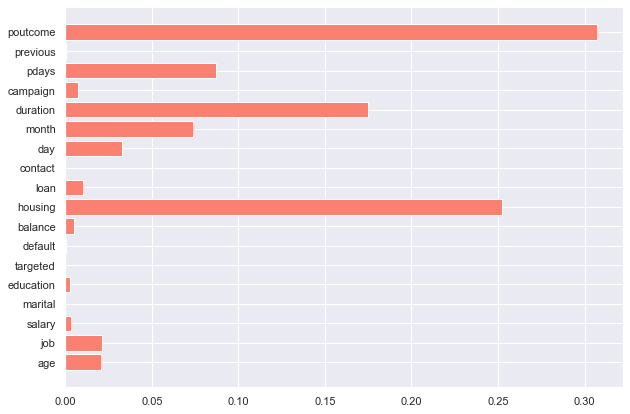

In [128]:
plt.figure(figsize=(10,7))
plt.barh(x_train.columns,rfc.feature_importances_,color='salmon');

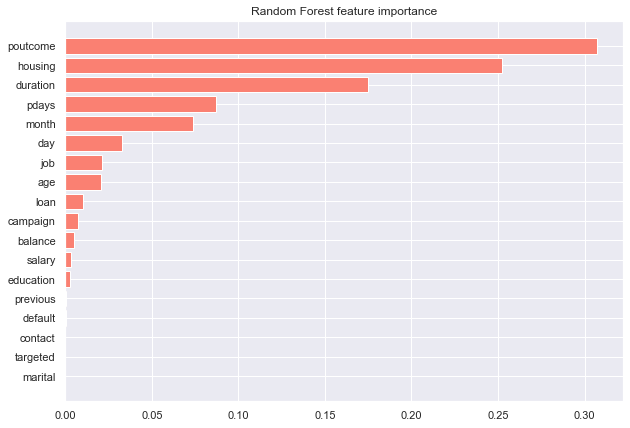

In [129]:
sorted=rfc.feature_importances_.argsort()
plt.figure(figsize=(10,7))
plt.barh(x_train.columns[sorted],rfc.feature_importances_[sorted],color='salmon')
plt.title('Random Forest feature importance')
plt.show()

## Compare the performance of the Random Forest and the logistic model –

In [63]:
print("Logistic Regression : \n\n " ,classification_report(y_test,y_pred))

print("Random Forest : \n\n ",classification_report(y_test,y_pred2))

Logistic Regression : 

                precision    recall  f1-score   support

           0       0.86      0.93      0.90      1885
           1       0.68      0.50      0.58       560

    accuracy                           0.83      2445
   macro avg       0.77      0.71      0.74      2445
weighted avg       0.82      0.83      0.82      2445

Random Forest : 

                precision    recall  f1-score   support

           0       0.85      0.96      0.90      1885
           1       0.75      0.43      0.55       560

    accuracy                           0.84      2445
   macro avg       0.80      0.70      0.73      2445
weighted avg       0.83      0.84      0.82      2445



As we can see that accuracy score of logistic model is 83% and accuracy score of random forest is 84%, random forest has slightly better accuracy as compared to logistic model so based on the accuracy score random forest model performed well.

### Compare the feature importance from the different models – do they agree? Are the top features similar in both models

In [74]:
print('Important features from Random forest model :\n')

imp_feat=rfc.feature_importances_
feature_importances=pd.Series(imp_feat, index=x_train.columns).sort_values(ascending=False)
feature_name = feature_importances.index.to_list()[:5]
print(feature_name)

print("\n\n")
print('Important features from Logistic Regression model :')

sfm = SelectFromModel(lr)
sfm.fit(x_train,y_train)
feature = sfm.get_support()
feature_name = x_train.columns[feature]
feature_name

Important features from Random forest model :

['poutcome', 'duration', 'pdays', 'housing', 'month']



Important features from Logistic Regression model :


Index(['targeted', 'default', 'housing', 'loan', 'duration', 'poutcome'], dtype='object')

No they do not agree, these top features are not similar in both model